# Avance 8

## *Markowitz*

Como sacar el portafolio óptimo, el de mínima volatilidad y el de máximo rendimiento

In [1]:
pip  install pulp

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gabig\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gabig\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gabig\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pulp import *

In [5]:
activos = ["AAPL", "MSFT","AMZN","GOOGL","META","TSLA","V"]

In [6]:
#exportamos la información de los activos
import yfinance as yf
start_date = '2017-01-01'
end_date = '2018-12-31'
n_assets = len(activos)
prices_df = yf.download(activos, start = start_date, end =  end_date)
prices_df

[*********************100%%**********************]  7 of 7 completed


Adj Close                                                          \
                 AAPL       AMZN      GOOGL        META       MSFT       TSLA   
Date                                                                            
2017-01-03  27.059309  37.683498  40.400501  116.860001  57.254704  14.466000   
2017-01-04  27.029018  37.859001  40.388500  118.690002  56.998528  15.132667   
2017-01-05  27.166475  39.022499  40.651001  120.669998  56.998528  15.116667   
2017-01-06  27.469332  39.799500  41.260502  123.410004  57.492573  15.267333   
2017-01-09  27.720938  39.846001  41.359001  124.900002  57.309597  15.418667   
...               ...        ...        ...         ...        ...        ...   
2018-12-21  36.215710  68.872498  49.562500  124.949997  93.468254  21.318001   
2018-12-24  35.278683  67.197998  49.233501  124.059998  89.567001  19.692667   
2018-12-26  37.763054  73.544998  52.392502  134.179993  95.685310  21.739332   
2018-12-27  37.517986  73.082001  52.645000  134.520004  96.275253  21.075333   
2018-12-28  37.537201  73.901001  52.334000  133.199997  95.523544  22.257999   

                            Close                        ...        Open  \
                     V       AAPL       AMZN      GOOGL  ...        MSFT   
Date                                                     ...               
2017-01-03   75.950844  29.037500  37.683498  40.400501  ...   62.790001   
2017-01-04   76.571846  29.004999  37.859001  40.388500  ...   62.480000   
2017-01-05   77.469879  29.152500  39.022499  40.651001  ...   62.189999   
2017-01-06   78.539902  29.477501  39.799500  41.260502  ...   62.299999   
2017-01-09   78.100433  29.747499  39.846001  41.359001  ...   62.759998   
...                ...        ...        ...        ...  ...         ...   
2018-12-21  120.349594  37.682499  68.872498  49.562500  ...  101.629997   
2018-12-24  117.899185  36.707500  67.197998  49.233501  ...   97.680000   
2018-12-26  126.131676  39.292500  73.544998  52.392502  ...   95.139999   
2018-12-27  127.855690  39.037498  73.082001  52.645000  ...   99.300003   
2018-12-28  126.819351  39.057499  73.901001  52.334000  ...  102.089996   

                                      Volume                                  \
                 TSLA           V       AAPL       AMZN      GOOGL      META   
Date                                                                           
2017-01-03  14.324000   78.760002  115127600   70422000   39180000  20663900   
2017-01-04  14.316667   79.440002   84472400   50210000   30306000  19630900   
2017-01-05  15.094667   80.339996   88774400  116602000   26810000  19492200   
2017-01-06  15.128667   81.300003  127007600  119724000   40342000  28545300   
2017-01-09  15.264667   82.279999  134247600   68922000   28178000  22880400   
...               ...         ...        ...        ...        ...       ...   
2018-12-21  21.160000  127.180000  382978400  272806000  104656000  56901500   
2018-12-24  20.900000  122.080002  148676800  144400000   36360000  22066000   
2018-12-26  20.000000  123.019997  234330000  208236000   46318000  39723400   
2018-12-27  21.322666  127.989998  212468400  194440000   45996000  31202500   
2018-12-28  21.540001  133.080002  169165600  176580000   34398000  22627600   

                                            
                 MSFT       TSLA         V  
Date                                        
2017-01-03   20694100   88849500  13785200  
2017-01-04   21340000  168202500   8033100  
2017-01-05   24876000   88675500   7805100  
2017-01-06   19922900   82918500   8898300  
2017-01-09   20382700   59692500   7305300  
...               ...        ...       ...  
2018-12-21  111242100  120252000  25448600  
2018-12-24   43935200   83398500   8617700  
2018-12-26   51634800  122446500  13499500  
2018-12-27   49498500  128626500  10883000  
2018-12-28   38196300  149085000   7381300  

[501 rows x 42 columns]

In [7]:
#eliminamos todas las columnas del dataframe, excepto la de los rendimientos de los activos
returns = prices_df['Adj Close'].pct_change().dropna()
returns

,AAPL,AMZN,GOOGL,META,MSFT,TSLA,V
Date,,,,,,,
2017-01-04,-0.001119,0.004657,-0.000297,0.015660,-0.004474,0.046085,0.008176
2017-01-05,0.005086,0.030732,0.006499,0.016682,0.000000,-0.001057,0.011728
2017-01-06,0.011148,0.019912,0.014994,0.022707,0.008668,0.009967,0.013812
2017-01-09,0.009160,0.001168,0.002387,0.012074,-0.003183,0.009912,-0.005595
2017-01-10,0.001009,-0.001280,-0.001414,-0.004404,-0.000320,-0.006096,-0.005382
...,...,...,...,...,...,...,...
2018-12-21,-0.038896,-0.057077,-0.031585,-0.063343,-0.032312,0.013920,-0.034949
2018-12-24,-0.025873,-0.024313,-0.006638,-0.007123,-0.041739,-0.076242,-0.020361
2018-12-26,0.070421,0.094452,0.064164,0.081573,0.068310,0.103930,0.069827


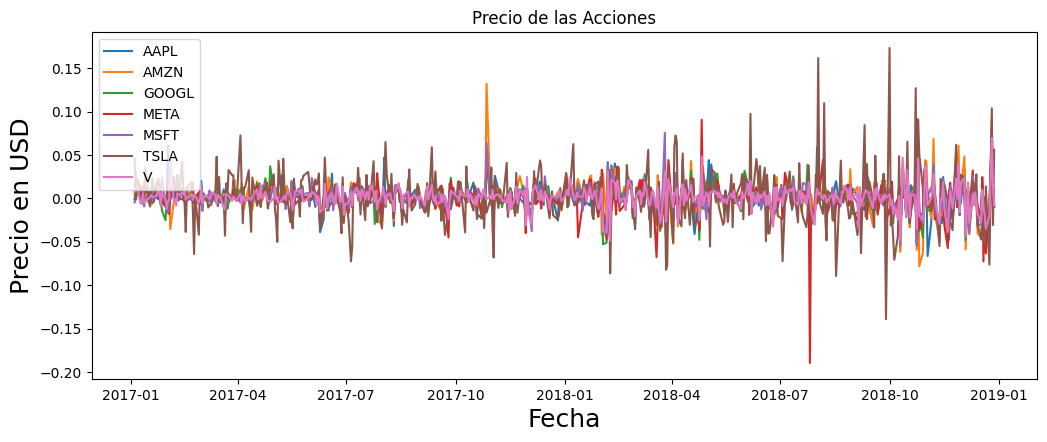

In [8]:
#graficas para visualizar los activos - precio de las acciones
plt.figure(figsize=(12.2,4.5))
for i in returns.columns.values:
    plt.plot( returns[i],  label=i)
plt.title('Precio de las Acciones')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(returns.columns.values, loc='upper left')
plt.show()

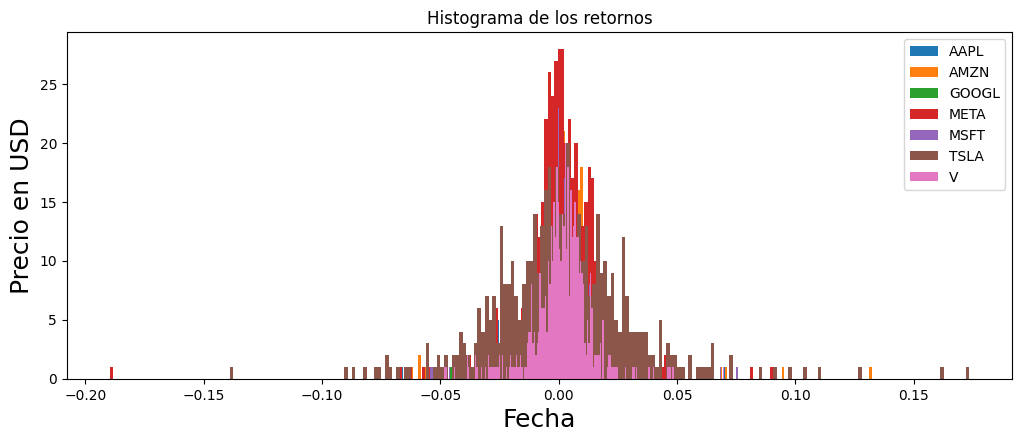

In [9]:
#graficas para visualizar los activos - histograma de los retornos
plt.figure(figsize=(12.2,4.5))
for i in returns.columns.values:
    plt.hist( returns[i],  label=i, bins = 200)
plt.title('Histograma de los retornos')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(returns.columns.values)
plt.show()

In [10]:
#calculamos el retorno esperado
from pypfopt import expected_returns
retornos1 = expected_returns.capm_return(returns, returns_data= True, risk_free_rate=0.07/100, frequency=252)
retornos1

AAPL     0.212392
AMZN     0.290729
GOOGL    0.226183
META     0.257885
MSFT     0.225362
TSLA     0.364577
V        0.194267
Name: mkt, dtype: float64

In [11]:
#creamos una función para calcular los pesos iguales
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal
pesos = pesosPortafolio(returns)
pesos

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [12]:
#calculamos la matriz de covarianzas
df_cov = returns.cov()*252
df_cov

,AAPL,AMZN,GOOGL,META,MSFT,TSLA,V
AAPL,0.057057,0.043791,0.033721,0.032959,0.034103,0.035320,0.029919
AMZN,0.043791,0.087237,0.048260,0.051733,0.049192,0.045512,0.039900
GOOGL,0.033721,0.048260,0.051435,0.042923,0.039531,0.034723,0.033663
META,0.032959,0.051733,0.042923,0.087237,0.036608,0.039561,0.033198
MSFT,0.034103,0.049192,0.039531,0.036608,0.050941,0.037588,0.035257
TSLA,0.035320,0.045512,0.034723,0.039561,0.037588,0.234357,0.031661
V,0.029919,0.039900,0.033663,0.033198,0.035257,0.031661,0.040422


In [14]:
#Varianza del Portafolio con pesos iguales
varianza_portafolio = pesos.T @ df_cov @pesos
"La varianza del portafolio es:" + " " + str(round(varianza_portafolio*100,1))+"%"

'La varianza del portafolio es: 4.5%'

In [15]:
#volatilidad del portafolio con pesos iguales
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"La volatilidad del portafolio es:" + " " + str(round(volatilidad_portafolio*100,1))+"%"

'La volatilidad del portafolio es: 21.3%'

In [16]:
#retorno del portafolio con pesos iguales
retorno_portafolio = np.sum(pesos*retornos1)
'El retorno anual del portafolio es:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'

'El retorno anual del portafolio es: 25.306%'

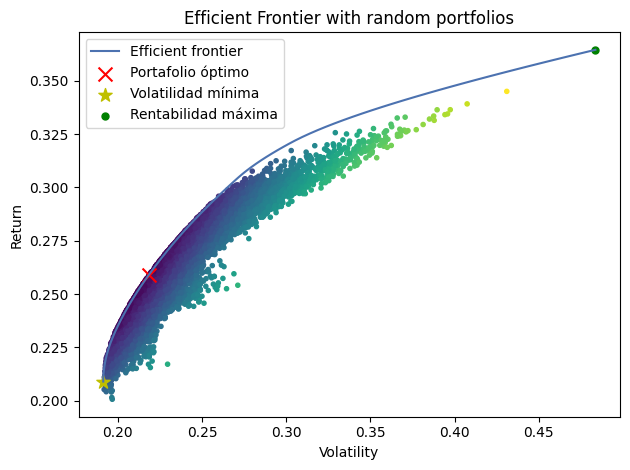

In [21]:
#encontramos y optimizamos potafolios
from pypfopt import plotting, EfficientFrontier

#calcular la frontera eficiente
fig, ax = plt.subplots()
ef = EfficientFrontier(retornos1, df_cov)

#Encontrar el portafolio óptimo (o tangente)
ef_max_sharpe = ef.deepcopy()
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()

#encontrar el portafolio de mínima volatilidad
ef_min_volatility = ef.deepcopy()
ef_min_volatility.min_volatility()
ret_min_vol, std_min_vol, _ = ef_min_volatility.portfolio_performance()

#Generar portafolios random
n_samples = 30000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

#Gráfica
ax.set_title("Efficient Frontier with random portfolios")
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)
ax.scatter(std_tangent, ret_tangent, marker="x", s=100, c="r", label="Portafolio óptimo")
ax.scatter(std_min_vol, ret_min_vol, marker="*", s=100, c="y", label="Volatilidad mínima")

#encontrar el portafolio de máxima rentabilidad
ef2 = ef.deepcopy()
rent_max, vol_max, shp_max = ef2.portfolio_performance()
ax.scatter(vol_max, rent_max, marker=".", s=100, c="g", label="Rentabilidad máxima")

ax.legend()
plt.tight_layout()
plt.show()

In [25]:
#Distribución de los pesos con cada portafolio
print("Portafolio de máxima rentabilidad:", ef2.clean_weights())
print("Portafolio de mínima volatilidad:", ef_min_volatility.clean_weights())
print("Portafolio óptimo:", ef_max_sharpe.clean_weights())

Portafolio de máxima rentabilidad: OrderedDict([('AAPL', 0.0), ('AMZN', 0.0015), ('GOOGL', 0.0), ('META', 0.0), ('MSFT', 0.0), ('TSLA', 0.99852), ('V', 0.0)])
Portafolio de mínima volatilidad: OrderedDict([('AAPL', 0.21259), ('AMZN', 0.0), ('GOOGL', 0.1253), ('META', 0.03593), ('MSFT', 0.06309), ('TSLA', 0.0155), ('V', 0.5476)])
Portafolio óptimo: OrderedDict([('AAPL', 0.1319), ('AMZN', 0.17928), ('GOOGL', 0.13956), ('META', 0.15125), ('MSFT', 0.14279), ('TSLA', 0.15645), ('V', 0.09876)])
